In [535]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
json_data=open('newfile.json').read()

data = json.loads(json_data)    

In [143]:
len(data)

119266

In [144]:
data[50000:55000]

[{'key': '1', 'slot': 5, 'time': 1119, 'type': 'actions'},
 {'key': '1', 'slot': 1, 'time': 1119, 'type': 'actions'},
 {'key': '1', 'slot': 4, 'time': 1119, 'type': 'actions'},
 {'key': '4', 'slot': 7, 'time': 1119, 'type': 'actions'},
 {'key': '4', 'slot': 6, 'time': 1119, 'type': 'actions'},
 {'key': '4', 'slot': 7, 'time': 1119, 'type': 'actions'},
 {'key': '1', 'slot': 8, 'time': 1119, 'type': 'actions'},
 {'key': '1', 'slot': 5, 'time': 1119, 'type': 'actions'},
 {'key': '4', 'slot': 0, 'time': 1119, 'type': 'actions'},
 {'key': '1', 'slot': 8, 'time': 1119, 'type': 'actions'},
 {'attackerhero': True,
  'attackerillusion': False,
  'attackername': 'npc_dota_hero_antimage',
  'inflictor': 'dota_unknown',
  'sourcename': 'npc_dota_hero_antimage',
  'targethero': False,
  'targetillusion': False,
  'targetname': 'npc_dota_creep_goodguys_melee',
  'targetsourcename': 'npc_dota_creep_goodguys_melee',
  'time': 1119,
  'type': 'DOTA_COMBATLOG_DAMAGE',
  'value': 86},
 {'assists': 1,
  '

### First visualization

Visualizing all movements collected so far.

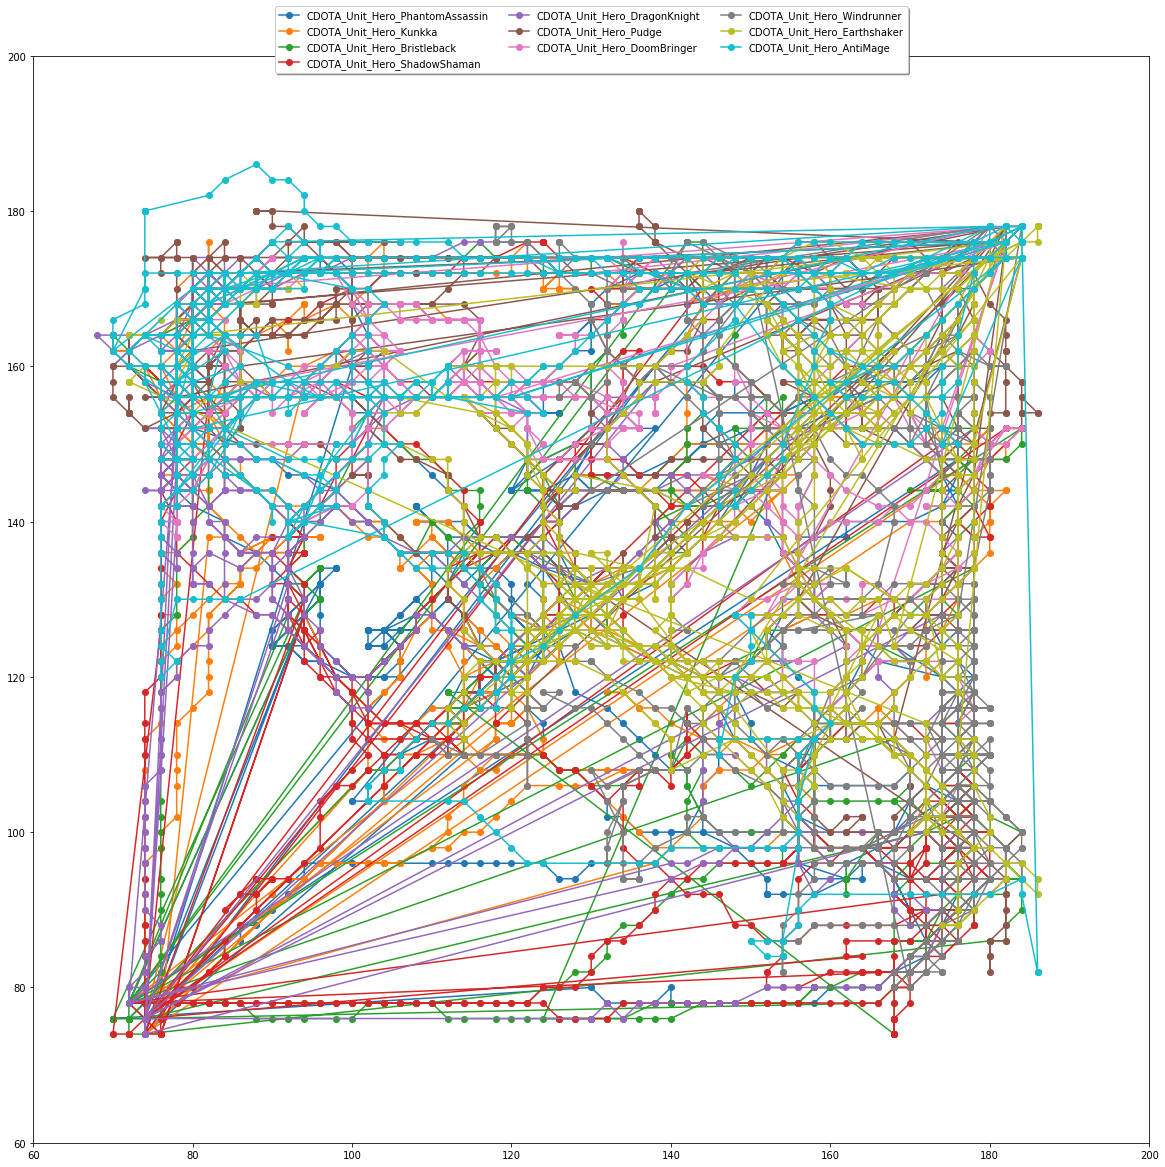

In [225]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.axis([60, 200, 60, 200])

for hero_name in df.unit.unique():
    mdf = df[df.unit==hero_name]
    xs = mdf.loc[:,['x']].values.ravel()
    ys = mdf.loc[:,['y']].values.ravel()
    plt.plot(xs, ys, '-o', label = hero_name)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

    

### Experimennts

Map hyperparameters

In [303]:
X_shift = 65 # cooridnates shifted from base point
Y_shift = 70 

X_min = 0
X_max = 125
Y_min = 0
Y_max = 120

dire_base_x = 111
dire_base_y = 104
dire_base_r2 = 26**2

radian_base_x = 10
radian_base_y = 8
radian_base_r2 = 26**2

top_vert_x = 13
top_hor_y = 104

bot_vert_x = 112
bot_hor_y = 8

mg = 7
top_vert_margin = mg
top_hor_margin = mg
bot_vert_margin = mg 
bot_hor_margin = mg

mid_margin = mg + 2

mid_coef_a = 0.95
mid_coef_b = -3.71

__Visualize map of zones.__

green - any

yellow - top (radiant)

magneta - bot (radiant)

red - middle 

blue - home zone


#### Plot movements over map

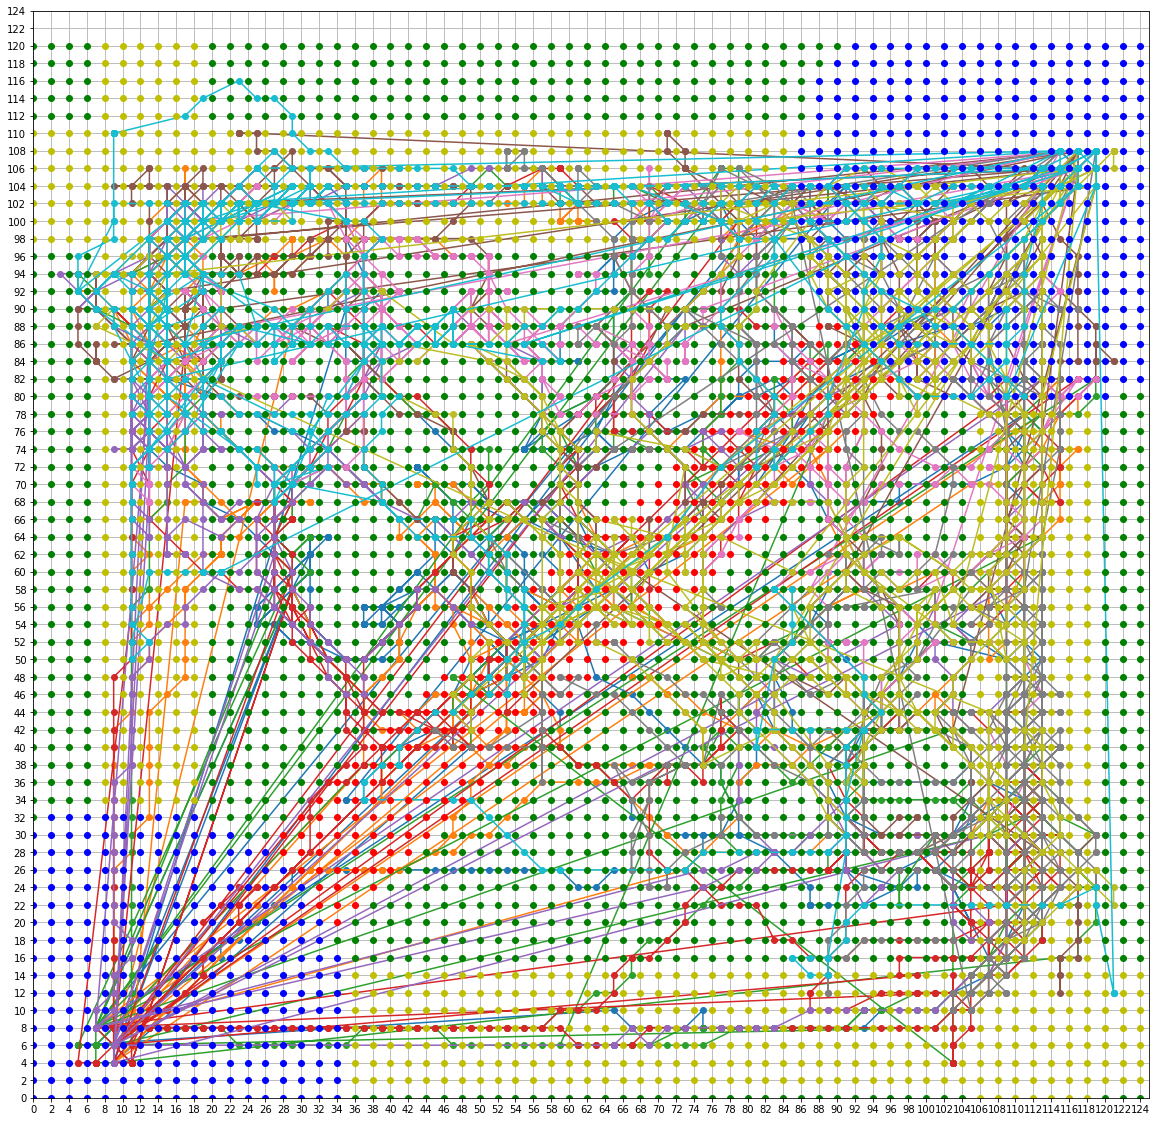

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.axis([X_min, X_max, X_min, Y_max])

# plot movements
for hero_name in df.unit.unique():
    mdf = df[df.unit==hero_name]
    xs = mdf.loc[:,['x']].values.ravel()
    ys = mdf.loc[:,['y']].values.ravel()
    plt.plot(xs, ys, '-o', label = hero_name)


for x in range(X_min, X_max+1, 2):
    for y in range(Y_min, Y_max+1, 2):
        c = 'g'
        
        # mid lane
        if (abs(y - mid_coef_b - mid_coef_a*x) < mid_margin):
            c = 'r'


        # top lane for radian
        if (x > top_vert_x - top_vert_margin and x < top_vert_x + top_vert_margin) or \
        (y > top_hor_y - top_hor_margin and y < top_hor_y + top_hor_margin):
            c = 'y'
        
        # bot lane for radian
        if (x > bot_vert_x - bot_vert_margin and x < bot_vert_x + bot_vert_margin) or \
        (y > bot_hor_y - bot_hor_margin and y < bot_hor_y + bot_hor_margin):
            c = 'y'
                
        # Radian base
        if ((x-radian_base_x)**2+(y-radian_base_y)**2 < radian_base_r2):
            c = 'b'
        # Dire base
        if ((x-dire_base_x)**2+(y-dire_base_y)**2 < dire_base_r2):
            c = 'b'
        
        plt.plot(x,y, 'o', c=c)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(X_min, max(X_max, Y_max) + 1, 20)
minor_ticks = np.arange(X_min, max(X_max, Y_max) + 1, 2)

plt.xticks(major_ticks)
plt.xticks(minor_ticks)
plt.yticks(major_ticks)
plt.yticks(minor_ticks)

plt.grid(True)
plt.show()

### Hero trace

### Get user position

We have following zone labels:

- forest
- top
- bot
- mid
- base
- enemy base
- dead

In [359]:
def get_position(x, y, team):
    c = 'forest'
        
    # mid lane
    if (abs(y - mid_coef_b - mid_coef_a*x) < mid_margin):
        c = 'mid'
            
        
    if (x > top_vert_x - top_vert_margin and x < top_vert_x + top_vert_margin) or \
    (y > top_hor_y - top_hor_margin and y < top_hor_y + top_hor_margin):
        if team == 0:
            c = 'top' # top lane for radian
        else:
            c = 'bot' # bot lane for dire
                
    # bot lane for radian
    elif (x > bot_vert_x - bot_vert_margin and x < bot_vert_x + bot_vert_margin) or \
    (y > bot_hor_y - bot_hor_margin and y < bot_hor_y + bot_hor_margin):
        if team == 0:
            c = 'bot' # bot lane for radian
        else:
            c = 'top' # top lane for dire
        
    # Radian base
    if ((x-radian_base_x)**2+(y-radian_base_y)**2 < radian_base_r2):
        if team == 0:
            c = 'base' # base for radian
        else:
            c = 'base_enemy' # enimy base for dire
                
    # Dire base
    if ((x-dire_base_x)**2+(y-dire_base_y)**2 < dire_base_r2):
        if team == 0:
            c = 'base_enemy' # enemy base for radian
        else:
            c = 'base' # base for dire
    
    return c

def position_over_time(series, x_ind=1, y_ind=2, life_state_ind=3, slot_ind=4):
    res = []
    team = 0 if series[0][slot_ind] <5 else 1 # 0 - radian, 1 - dire
    for tick in series:
        x = tick[x_ind]
        y = tick[y_ind]
        c = get_position(x, y, team)
        if tick[life_state_ind]!=0:
            c = 'dead'
        res.append([tick[0], c])
    return res
        

Collect all data, relevant to heroes on the map

In [310]:
from collections import Counter

heroTraces = []
keys = ['time', 'unit', 'slot', 'x', 'y', 'xp', 'kills','deaths', 'level', 'gold', 'life_state']

for r in data[:]:
    if 'unit' in r.keys():
        if 'x' in r.keys():
            c = Counter()
            for k in keys:
                c[k] = r[k]
            c['x'] = c['x'] - X_shift
            c['y'] = c['y'] - X_shift
            heroTraces.append(dict(c))
            
game_df = pd.DataFrame(heroTraces)

Separate data for each hero

In [311]:
hero = []
for i in range(10):
    hero.append(game_df[game_df.slot==i])

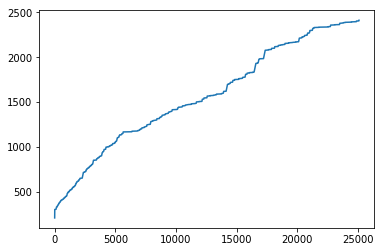

In [321]:
hero[0]

plt.plot(hero[0].gold, hero[0].time)

Map zones for each position over time

In [317]:
hero_zone_change = []

for h in hero[:5]:
    position_series = h.loc[:, ['time', 'x', 'y', 'life_state', 'slot']].values
    transitions_df = pd.DataFrame(position_over_time(position_series), columns=['time', 'zone'])
    hero_zone_change.append(transitions_df)

__Heroe's zone over time__

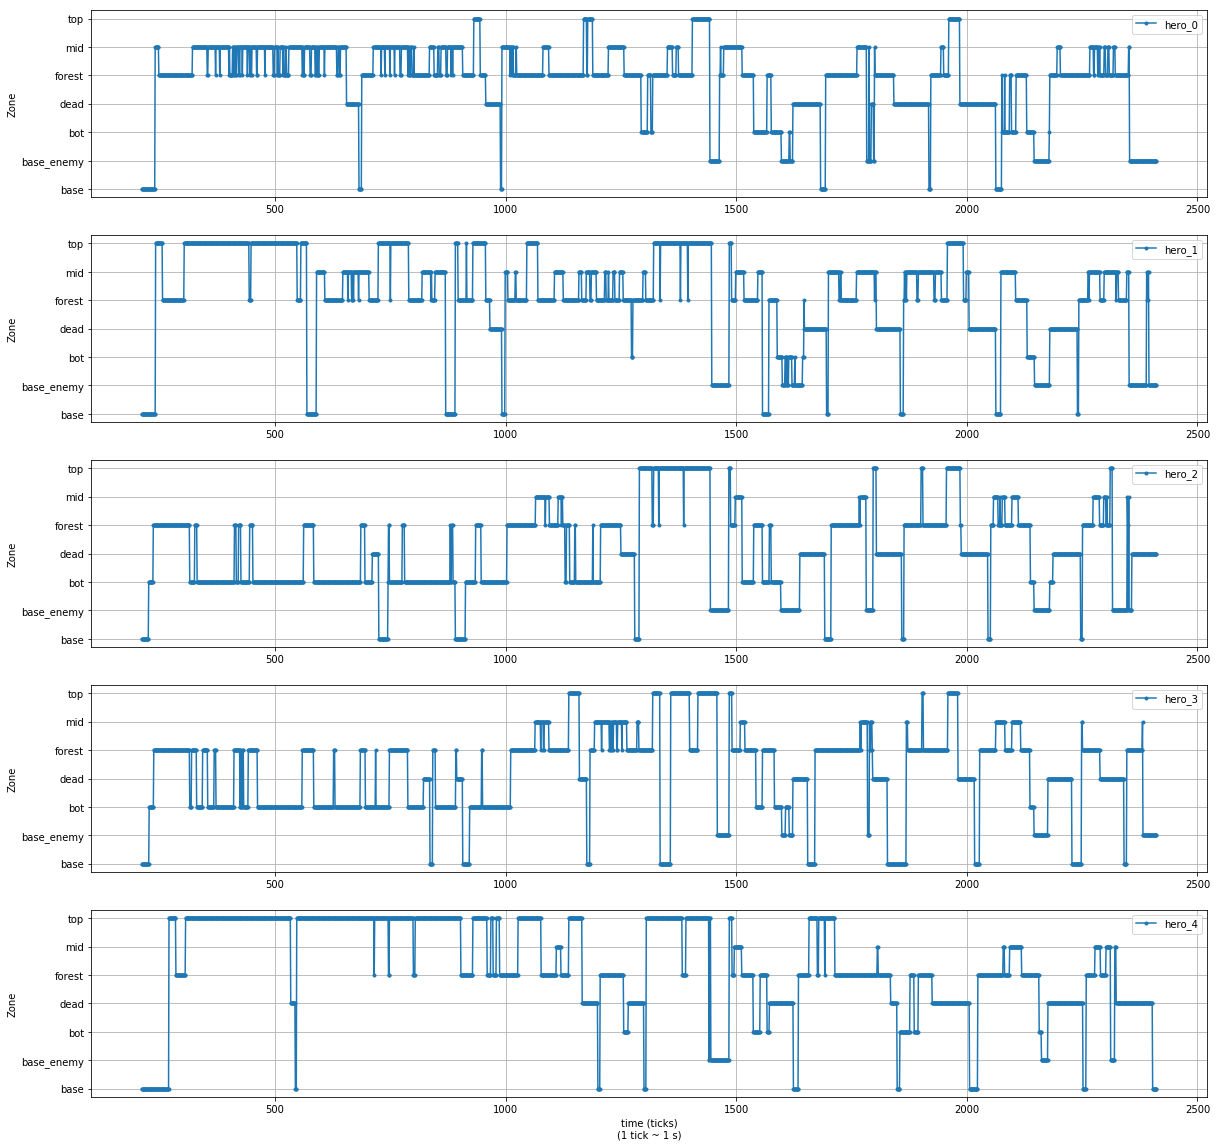

In [318]:
plt.figure(figsize=(20, 20))
plt.title('Heroe\'s zone over time.')
for i, tr in enumerate(hero_zone_change):
    plt.subplot(len(hero_zone_change)*100 + 10 + i+1)
    plt.plot(tr.time, 
            tr.zone, 
            label="hero_{}".format(i), 
            marker='.'
           )
    plt.ylabel('Zone')
    plt.grid(True)
    plt.legend()

plt.xlabel('time (ticks)\n(1 tick ~ 1 s)')
plt.show()
    

### Stat collector

Collect statistic for each lane:

- gold
- xp gained
- kills
- deaths

In [460]:
def calc_stats(heroes, team):
    size = max([heroes[i].time.max() for i in range(len(heroes))])

    stat = {
        'gold':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        },
        'xp':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        },
        'deaths':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        },
        'kills':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        }
    }

    def diff(new, old):
        t = new - old
        return t, new

    for h in heroes:
        base_gold = 0
        base_xp = 0
        base_kills = 0
        base_deaths = 0

        for index, row in enumerate(h.itertuples()):
            g = row.gold
            xp = row.xp
            k = row.kills
            d = row.deaths

            # compute difference
            g, base_gold = diff(g, base_gold)
            xp, base_xp = diff(xp, base_xp)
            k, base_kills = diff(k, base_kills)
            d, base_deaths = diff(d, base_deaths)

            key = get_position(row.x, row.y, team)


            stat['gold'][key][index] += g
            stat['xp'][key][index] += xp
            stat['kills'][key][index] += k
            stat['deaths'][key][index] += d

    return stat

Convert arrays with changes to array of continious values.

For example

this [0,0,1,0,2,3,0,0] will become [0,0,1,1,3,6,6,6]



In [457]:
def calc_absolete(stat, heroes):
    size = max([heroes[i].time.max() for i in range(len(heroes))])

    stat_absolete = {
        'gold':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        },
        'xp':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        },
        'deaths':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        },
        'kills':{
            'forest': np.zeros(size),
            'top':np.zeros(size),
            'bot':np.zeros(size),
            'mid':np.zeros(size),
            'base_enemy':np.zeros(size),
            'base':np.zeros(size)
        }
    }

    for param in stat.keys():
        for zone in stat[param].keys():
            for i in range(len(stat[param][zone])): #(stat[param][zone][1:]):
                stat_absolete[param][zone][i] = stat[param][zone][i] + stat_absolete[param][zone][i-1]
    return stat_absolete

### Visualize

In [466]:
radian_stat = calc_stats(hero[:5], team=0)
radian_stat_absolete = calc_absolete(radian_stat, hero[:5])

dire_stat = calc_stats(hero[5:], team=1)
dire_stat_absolete = calc_absolete(dire_stat, hero[5:])

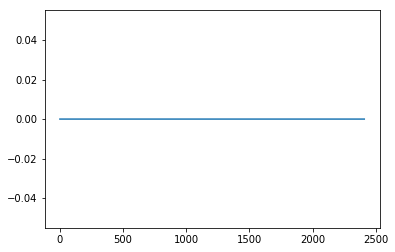

In [465]:
plt.plot(radian_stat_absolete['deaths']['base'])

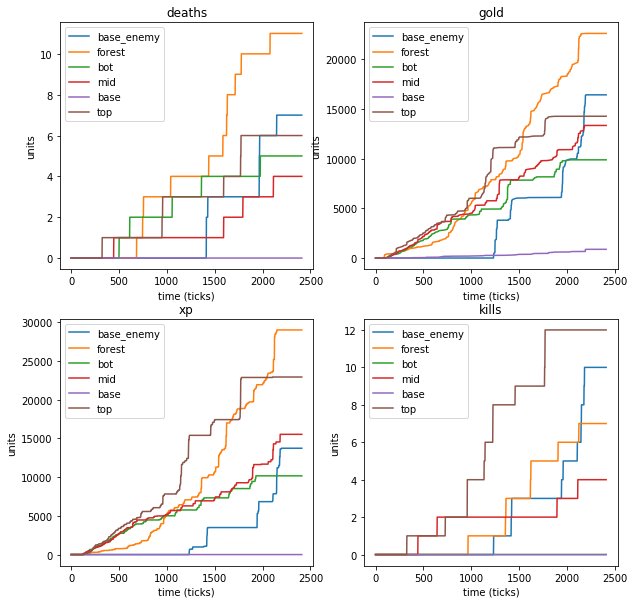

In [486]:
i = 0
plt.figure(figsize=(10, 10))
for param in stat.keys():
    i += 1
    plt.subplot(220 + (i))
    plt.title(param)
    plt.ylabel('units')
    for zone in stat[param].keys():
        plt.plot(radian_stat_absolete[param][zone], label=zone)
    plt.xlabel('time (ticks)')
    plt.legend()


plt.show()

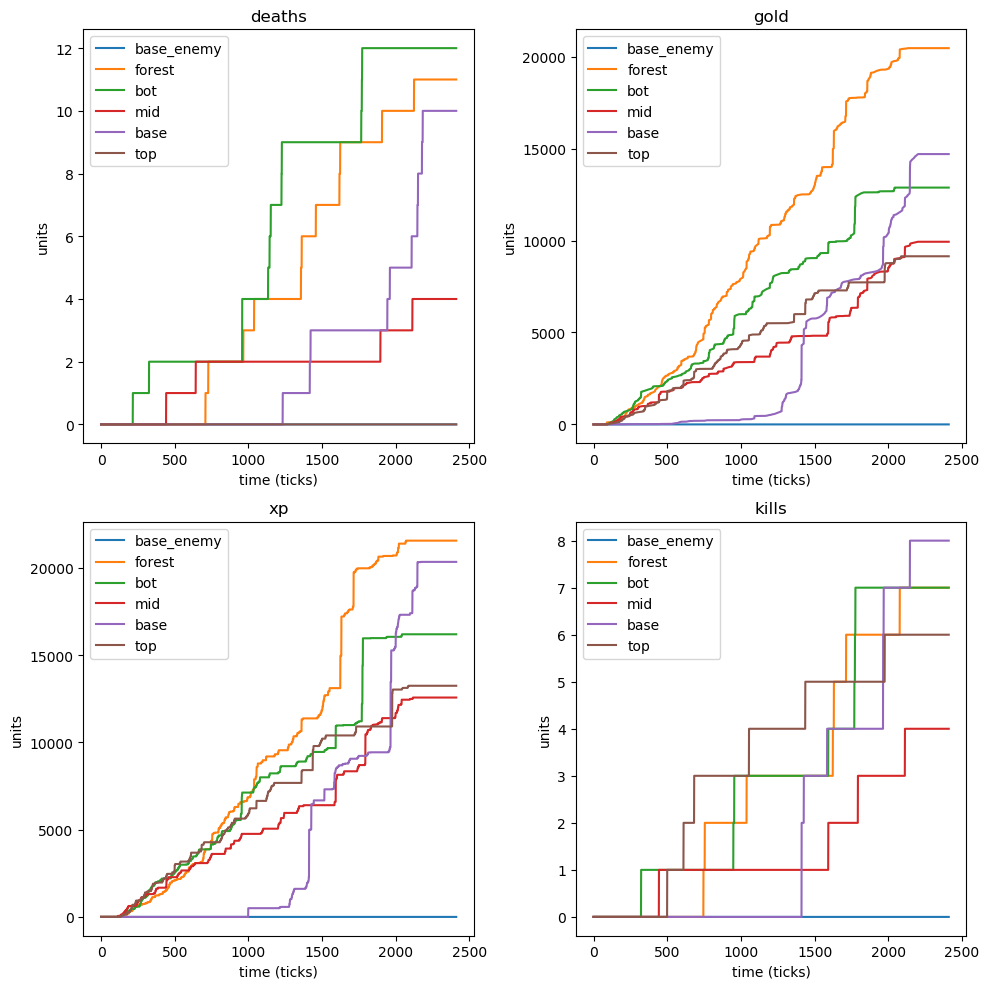

In [659]:
i = 0
plt.figure(figsize=(10, 10))
for param in stat.keys():
    i += 1
    plt.subplot(220 + (i))
    plt.title(param)
    plt.ylabel('units')
    for zone in stat[param].keys():
        plt.plot(dire_stat_absolete[param][zone], label=zone)
    plt.xlabel('time (ticks)')
    plt.legend()

plt.tight_layout()
plt.show()

In [594]:
def get_presence(hero_zone_ch, zone, label):
    presence = []
    time = []
    for i in hero_zone_ch.itertuples():
        if i.zone == zone:
            presence.append(label)
            time.append(i.time)
            
    return presence, time

def get_diff(stat1, stat2, zone, param):
    diff = []
    for i in range(len(stat[param][zone])):
        diff.append(stat1[param][zone][i] - stat2[param][zone][i])
    return diff

# h = hero_zone_change[0]
# get_presence(h, 'base', 0)

# get_diff(radian_stat_absolete, dire_stat_absolete, 'top',  'gold')

In [ ]:
# def visualize_zone(team1, team2, heroes_moves, zone):
# #     plt.xkcd()
#     plt.rcdefaults()
#     major_ticks = np.arange(0, len(heroes_moves), 1)
    
#     fig, ax = plt.subplots(2,2, figsize=(15,15))
#     fig
#     ax = ax.ravel()
#     ind = 0
#     for param in team1.keys():
#         ax1 = ax[ind]
#         ind += 1
        
#         diff = get_diff(team1, team2, zone, param)
    
#         ax1.plot(range(len(diff)), diff)
#         ax1.set_label('difference')
#         ax1.set_title(param + ' at ' + zone)
#         ax1.set_xlabel('time (ticks)')
#         ax1.set_ylabel('units', color='b')
    

#         ax2 = ax1.twinx()
#         for c, h in enumerate(heroes_moves):
#             pr, t = get_presence(h, zone, (c))
#             ax2.scatter(t, pr)
#             ax2.set_yticks(major_ticks)
#         ax2.set_ylabel('presence of hero by id', color='g')
            
#     plt.tight_layout()
#     plt.legend()
#     plt.show()

In [616]:
hero_zone_change = []

for h in hero:
    position_series = h.loc[:, ['time', 'x', 'y', 'life_state', 'slot']].values
    transitions_df = pd.DataFrame(position_over_time(position_series), columns=['time', 'zone'])
    hero_zone_change.append(transitions_df)

In [617]:
len(hero_zone_change)

10

fasdfasdf


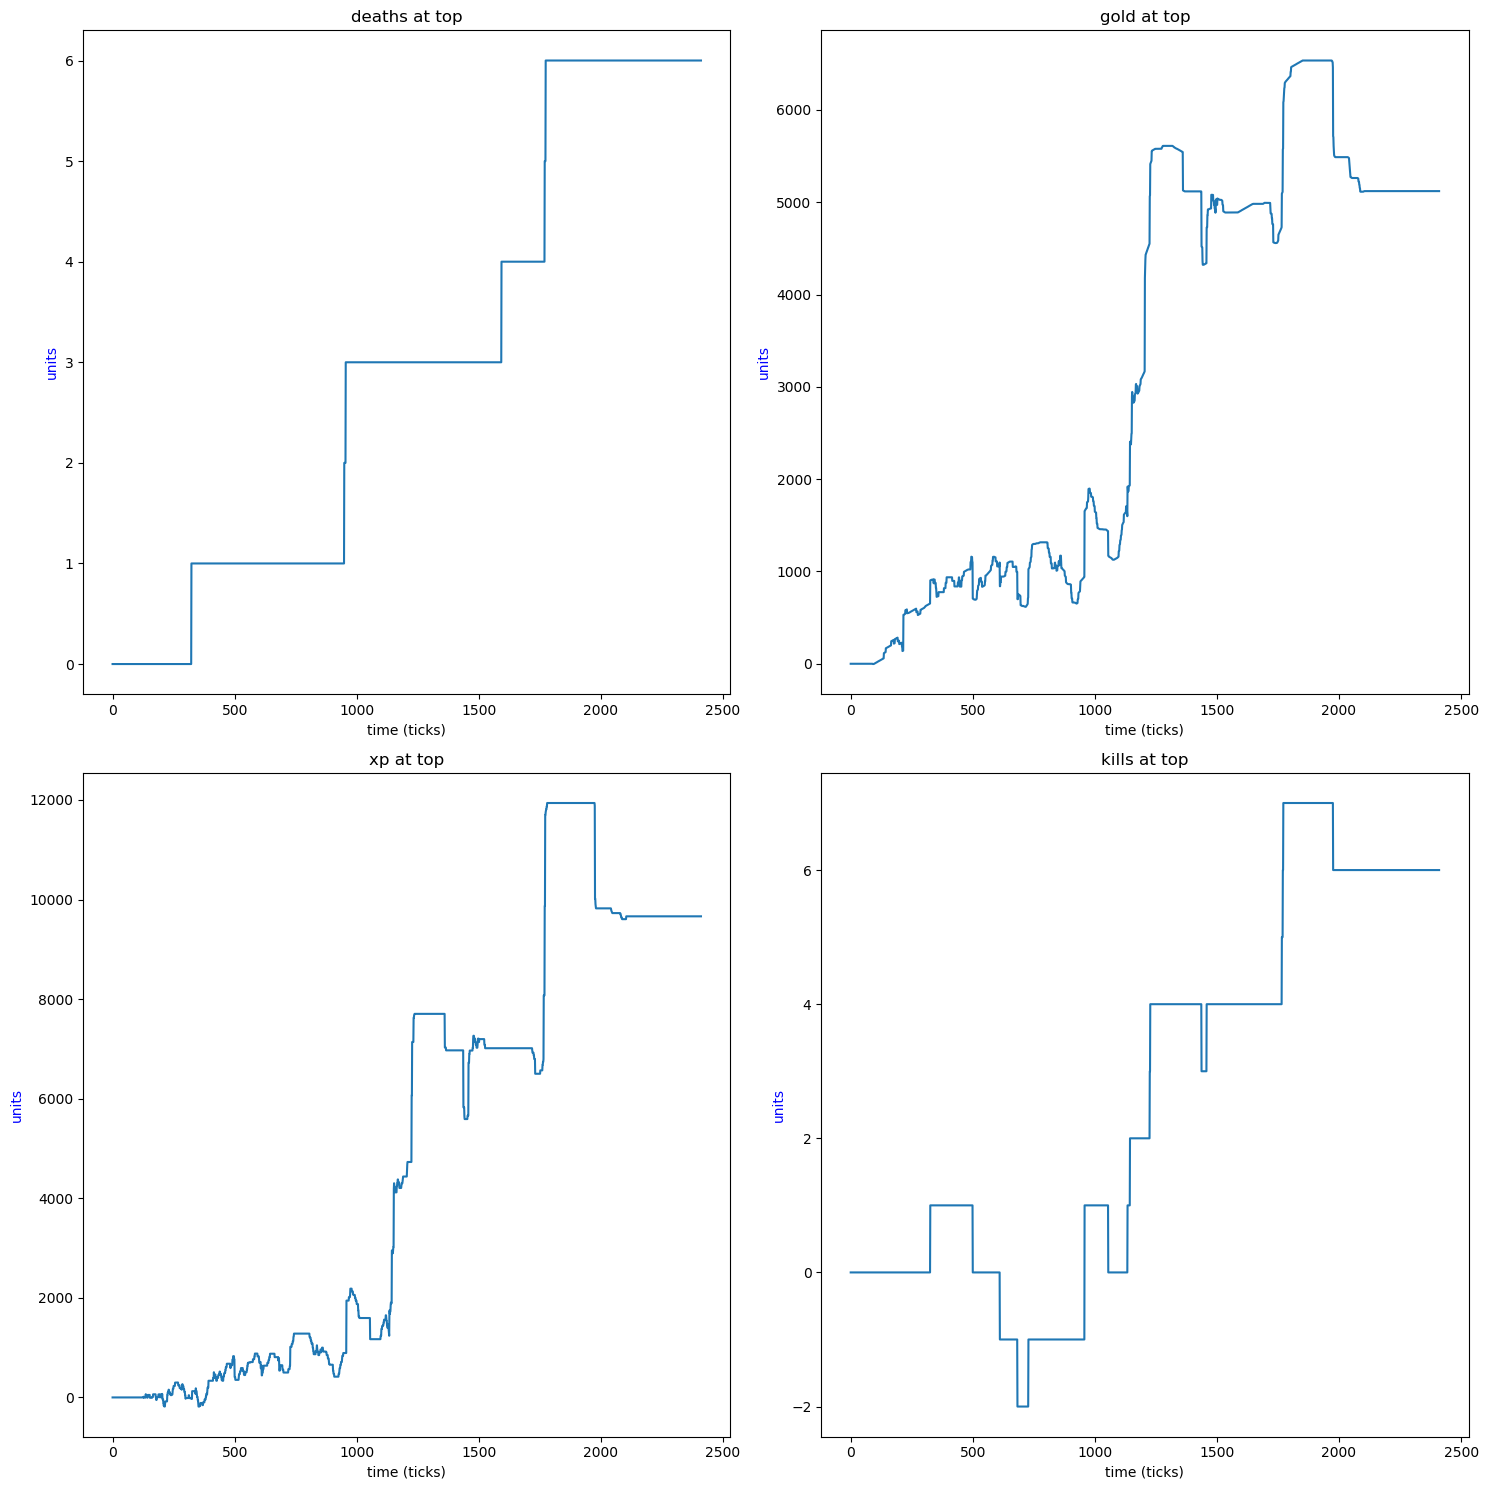

In [657]:
visualize_zone(radian_stat_absolete, dire_stat_absolete,'mid')

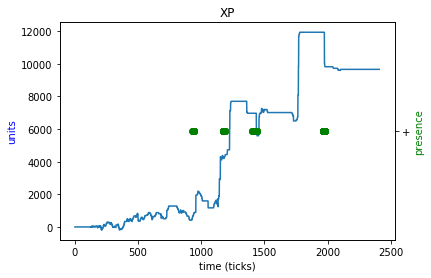

In [534]:
fig, ax1 = plt.subplots()
ax1.set_title('XP')
ax1.plot(diff)
ax1.set_xlabel('time (ticks)')
ax1.set_ylabel('units', color='b')

ax2 = ax1.twinx()
ax2.scatter(tick, presence, color='g')
ax2.set_ylabel('presence', color='g')

plt.show()